Project2 Zindi women  and machine learn project

In [2]:
import pandas as pd
import numpy as np
import os, random, math, glob
from IPython.display import Image as IM
from IPython.display import clear_output
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 10]
import seaborn as sns

/Users/alexandrazimmermann/neuefische/ds-diabetes-challenge/.venv/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [3]:
df = pd.read_csv("Train.csv")

In [4]:
df.head()

,ward,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,...,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL
0,41601001: Ward 1,1674.45058,5888.20750,16.773757,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,...,0.002848,0.007537,0.000000,0.012928,0,0,ZA4161001,-29.682270,24.734743,0.292039
1,41601002: Ward 2,1736.99230,6735.33812,21.496661,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,...,0.014566,0.057127,0.019092,0.004131,0,0,ZA4161002,-29.119311,24.757737,3.207775
2,41601003: Ward 3,2403.57591,7273.04995,10.931425,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,...,0.057560,0.010358,0.001421,0.040881,0,0,ZA4161003,-29.142276,25.094093,0.000000
3,41601004: Ward 4,1740.78737,5734.49046,23.119257,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,...,0.000000,0.000669,0.000000,0.005011,0,0,ZA4161004,-29.372052,24.942867,2.038778
4,41601005: Ward 5,1730.51451,6657.23835,13.652252,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,...,0.004859,0.001290,0.000673,0.017629,0,0,ZA4161005,-29.409381,25.290165,0.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2822 entries, 0 to 2821
Data columns (total 63 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ward               2822 non-null   object 
 1   total_households   2822 non-null   float64
 2   total_individuals  2822 non-null   float64
 3   target             2822 non-null   float64
 4   dw_00              2822 non-null   float64
 5   dw_01              2822 non-null   float64
 6   dw_02              2822 non-null   float64
 7   dw_03              2822 non-null   float64
 8   dw_04              2822 non-null   float64
 9   dw_05              2822 non-null   float64
 10  dw_06              2822 non-null   float64
 11  dw_07              2822 non-null   float64
 12  dw_08              2822 non-null   float64
 13  dw_09              2822 non-null   float64
 14  dw_10              2822 non-null   float64
 15  dw_11              2822 non-null   float64
 16  dw_12              2822 

In [6]:
df.columns

Index(['ward', 'total_households', 'total_individuals', 'target', 'dw_00',
       'dw_01', 'dw_02', 'dw_03', 'dw_04', 'dw_05', 'dw_06', 'dw_07', 'dw_08',
       'dw_09', 'dw_10', 'dw_11', 'dw_12', 'dw_13', 'psa_00', 'psa_01',
       'psa_02', 'psa_03', 'psa_04', 'stv_00', 'stv_01', 'car_00', 'car_01',
       'lln_00', 'lln_01', 'lan_00', 'lan_01', 'lan_02', 'lan_03', 'lan_04',
       'lan_05', 'lan_06', 'lan_07', 'lan_08', 'lan_09', 'lan_10', 'lan_11',
       'lan_12', 'lan_13', 'lan_14', 'pg_00', 'pg_01', 'pg_02', 'pg_03',
       'pg_04', 'lgt_00', 'pw_00', 'pw_01', 'pw_02', 'pw_03', 'pw_04', 'pw_05',
       'pw_06', 'pw_07', 'pw_08', 'ADM4_PCODE', 'lat', 'lon', 'NL'],
      dtype='object')

In [7]:
df.describe()

,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,...,pw_02,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,lat,lon,NL
count,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,...,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.0,2822.0,2822.000000,2822.000000,2822.000000
mean,3665.281214,12869.130053,24.507554,0.712196,0.092616,0.032043,0.006057,0.008665,0.006289,0.022375,...,0.127555,0.041589,0.019655,0.011008,0.110818,0.0,0.0,-26.880740,28.666515,17.437560
std,3266.364522,9696.690518,10.294387,0.214035,0.182852,0.080253,0.019374,0.030697,0.024606,0.037127,...,0.156400,0.057331,0.032926,0.023672,0.185401,0.0,0.0,2.021279,2.373809,18.958621
min,1.000000,402.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,-32.490089,16.760022,0.000000
25%,1778.858235,7071.205695,16.751556,0.594212,0.002895,0.002407,0.000000,0.000000,0.000000,0.002716,...,0.008673,0.002099,0.000715,0.000159,0.005217,0.0,0.0,-28.569019,27.707932,3.033397
50%,2398.249935,9366.989680,24.156670,0.766841,0.010425,0.005762,0.000807,0.000607,0.000865,0.008639,...,0.069065,0.016496,0.005164,0.001459,0.025165,0.0,0.0,-26.549866,28.959679,9.205572
75%,3987.080563,14241.233015,32.226553,0.881708,0.068209,0.027913,0.002538,0.002225,0.003027,0.025218,...,0.183384,0.058626,0.025055,0.009432,0.116638,0.0,0.0,-25.572130,30.441505,26.890531
max,39684.942130,91716.746370,55.528423,0.994962,0.931490,0.951806,0.264239,0.392085,0.435912,0.412936,...,1.000000,0.327393,0.306787,0.228261,0.961523,0.0,0.0,-22.331267,32.858249,63.000000


In [8]:
df.isnull().sum()

ward                 0
total_households     0
total_individuals    0
target               0
dw_00                0
                    ..
pw_08                0
ADM4_PCODE           0
lat                  0
lon                  0
NL                   0
Length: 63, dtype: int64

<AxesSubplot:xlabel='target', ylabel='Count'>

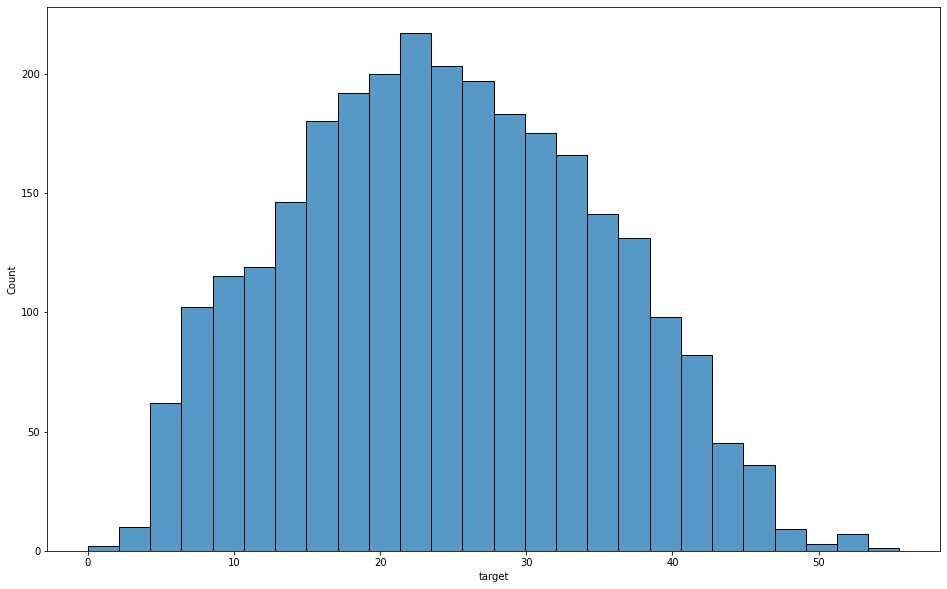

In [9]:
sns.histplot(df.target)

array([[<AxesSubplot:title={'center':'total_households'}>,
        <AxesSubplot:title={'center':'total_individuals'}>,
        <AxesSubplot:title={'center':'target'}>,
        <AxesSubplot:title={'center':'dw_00'}>,
        <AxesSubplot:title={'center':'dw_01'}>,
        <AxesSubplot:title={'center':'dw_02'}>,
        <AxesSubplot:title={'center':'dw_03'}>,
        <AxesSubplot:title={'center':'dw_04'}>],
       [<AxesSubplot:title={'center':'dw_05'}>,
        <AxesSubplot:title={'center':'dw_06'}>,
        <AxesSubplot:title={'center':'dw_07'}>,
        <AxesSubplot:title={'center':'dw_08'}>,
        <AxesSubplot:title={'center':'dw_09'}>,
        <AxesSubplot:title={'center':'dw_10'}>,
        <AxesSubplot:title={'center':'dw_11'}>,
        <AxesSubplot:title={'center':'dw_12'}>],
       [<AxesSubplot:title={'center':'dw_13'}>,
        <AxesSubplot:title={'center':'psa_00'}>,
        <AxesSubplot:title={'center':'psa_01'}>,
        <AxesSubplot:title={'center':'psa_02'}>,
        <Ax

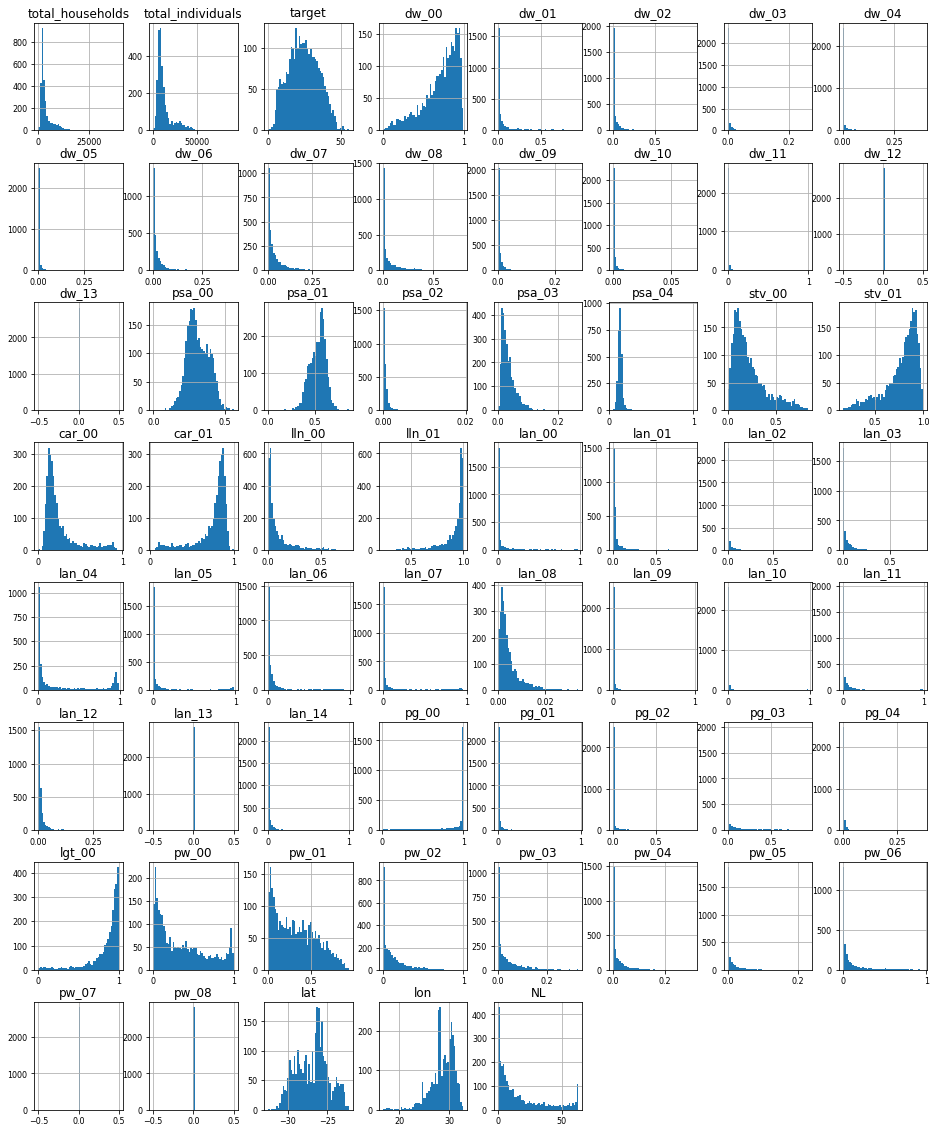

In [10]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

# __logarithmic transformation?__

In [ ]:

# Log-transform the skewed features ['capital-gain', 'capital-loss']
skewed = ["dw_00", "dw_01"]
features[skewed] = features[skewed].apply(lambda x: np.log(x + 1))

# __scaling?__

ward:  

In [11]:
df.ward.nunique()

2822

Quick eda with pandas profiling:

In [12]:
import pandas as pd
from pandas_profiling import ProfileReport

In [13]:

# Then run Pandas Profiling
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)

In [17]:
profile